# <span style="color:#0b486b">SIT 112 - Data Science Concepts</span>
# <span style="color:#0b486b">Data Science Project</span>

---
Lecturer: Sergiy Shelyag | sergiy.shelyag@deakin.edu.au<br />

School of Information Technology, <br />
Deakin University, VIC 3215, Australia.

### <span style="color:#0b486b">Due: 10pm, Sunday of Week11, 20th September 2020</span>
---


### <span style="color:#0b486b">Instructions</span>

This notebook has been prepared for you to complete the Data Science Project. Some sections have been pre-filled  to help you get started. **The total mark for this task is 100**.

There are two parts in this notebook that require you to complete:

* **Part 1**: *Linear Regression* (**70 marks**)
* **Part 2**: *Classification* (**30 marks**)

Each part includes three main components:
 * **A:** Load a dataset from sklearn and examine it.
 * **B:** Build a training model and make predictions.
 * **C:** Report the results and visualize the data.

Before you start, read the entire notebook carefully to understand what you need to do. You should also refer to the main instructions in *Project_instructions.pdf*  to know what else you need to complete for this project.

As you go through this notebook:


* markdown cells marked with **Note** mean description sections.


* markdown cells marked with **Instructions** mean the instructions given to you to complete the sections.


* Instructions marked with **(D)** and **(HD)** are for students aiming at high grades. They are more involved and can be completed after all other instructions.


* For each cell marked with **#YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL**, there will be places where you **must** supply your own codes when instructed. <br><br>

* For each cell marked with **#YOU ARE REQUIRED TO INSERT YOUR COMMENT IN THIS CELL**, there will be place where you **must** provide your own comment when instructed. <br><br>


In the end, you must execute the entire notebook and submit two files:

 1. The source of your solution notebook: **[YourID]_project_solution.ipynb**
 2. And an exported version of your output: **[YourID]_project_output.html**
       

Please proceed with the instructions for each part below to complete your tasks.

**Note**: The following packages will be required for this assignment. If you need to import more packages, you might append them to the end of the following cell. 

In [2]:
'''
Import packages needed for processing
'''
import numpy as np
from sklearn import datasets
import sklearn.metrics as metrics

from sklearn import linear_model
from sklearn import naive_bayes
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt 


%matplotlib inline

'''
If you need add any additional packages, then add them below this line
'''

import matplotlib.lines as lines
import scipy.stats as stats

# <span style="color:#0b486b">Part 1: Linear Regression</span>

In this part, you will be required to work on Linear Regression for the Linnerud dataset from sklearn.

The Linnerud dataset is a multi-output regression dataset. It consists of three excercise (data) and three physiological (target) variables collected from twenty middle-aged men in a fitness club:

physiological - containing 20 observations on 3 physiological variables:
Weight, Waist and Pulse.

exercise - containing 20 observations on 3 exercise variables:
Chins, Situps and Jumps.

## Part 1A: Load and examine the Linnerud dataset

**Instruction 1.1.** Write your code to load the **Linnerud** dataset from sklearn and assign it to a variable called `linnerud`.

[**Total mark: 3**]

In [3]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
1. Write your code to load the **Linnerud** dataset from sklearn 
    and assign it to a variable called `linnerud`.
'''
linnerud = datasets.load_linnerud()

print(linnerud.keys())

dict_keys(['data', 'feature_names', 'target', 'target_names', 'DESCR', 'data_filename', 'target_filename'])


**Note:** `linnerud` is a dictionary with two keys: *'data'* - a numpy array containing the features and *'target'* containing the labels. The cell code below assigns the data to variable `X` and the labels to variable `Y`. Run the cell and use `X` and `Y` for later tasks.

In [4]:
X = linnerud['data']
Y = linnerud['target']
feature_names_X = linnerud['feature_names']
label_names_Y = linnerud['target_names']

**Instruction 1.2.** Now you need to examine the size and structure of the dataset. 

**Your tasks are:**
1. Write your code to find and print out the number of **samples** and the number of **features** in the dataset. (1 mark)
2. Print the feature and label names for the dataset. (1 mark)

[**Total mark: 2**]

In [5]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
1. Write your code to find and print out the number of **samples** 
    and the number of **features** in the dataset.
    Using variable X.
'''
print('The number of samples:')
print(len(X))


print('The number of features:')
print(len(feature_names_X))


# 2. Print the feature and label names for the dataset.
print(feature_names_X)

The number of samples:
20
The number of features:
3
['Chins', 'Situps', 'Jumps']


**Instruction 1.3.** We also need to get a brief understanding about the task by doing some statistics on the features and labels.

**Your tasks are:**

1. Write your code to print the **min**, **max**, **median** for each of the features. You need to use a loop in this task. (2 marks)
2. Construct a **box-plot** for each of the features. (3 marks)

3. Write your code to print the **min**, **max**, **median** for each of the labels. You need to use a loop in this task. (1 marks)
4. Construct a **box-plot** for each of the labels. (1 marks)

Do not forget to look at the feature and label names and print them in the output accordingly.

[**Total marks: 7**]

In [6]:
def splitDataByFeature(data, feature):
    splitData = []
    for i in data:
        splitData.append(i[feature])
    return splitData

chins = splitDataByFeature(X, 0)
situps = splitDataByFeature(X, 1)
jumps = splitDataByFeature(X, 2)

# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
#1. Write your code to print the min, max, median for each of the features. You need to use a loop in this task. 

print('max: ' + str(max(chins)) + ', min: ' + str(min(chins)) + ', median: ' + str(np.median(chins)))
print('max: ' + str(max(situps)) + ', min: ' + str(min(situps)) + ', median: ' + str(np.median(situps)))
print('max: ' + str(max(jumps)) + ', min: ' + str(min(jumps)) + ', median: ' + str(np.median(jumps)))

max: 17.0, min: 1.0, median: 11.5
max: 251.0, min: 50.0, median: 122.5
max: 250.0, min: 25.0, median: 54.0


Text(0.5, 1.0, 'jumps BoxPlot')

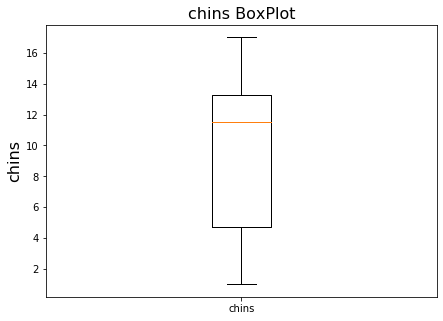

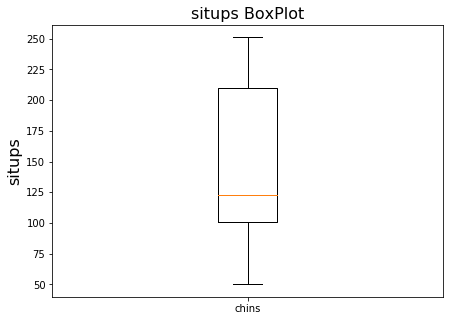

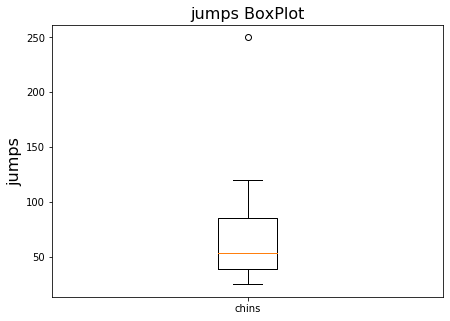

In [7]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
#2. Construct a box-plot for each of the features.
fig, ax = plt.subplots(figsize=(7, 5))
ax.boxplot(chins, 0, labels=['chins'])
ax.set_ylabel('chins', fontsize=16)
ax.set_title('chins BoxPlot', fontsize=16)

fig, ax = plt.subplots(figsize=(7, 5))
ax.boxplot(situps, 0, labels=['chins'])
ax.set_ylabel('situps', fontsize=16)
ax.set_title('situps BoxPlot', fontsize=16)

fig, ax = plt.subplots(figsize=(7, 5))
ax.boxplot(jumps, 0, labels=['chins'])
ax.set_ylabel('jumps', fontsize=16)
ax.set_title('jumps BoxPlot', fontsize=16)

In [8]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
#3. Write your code to print the min, max, median for each of the labels. You need to use a loop in this task. 
weight = splitDataByFeature(Y, 0)
waist = splitDataByFeature(Y, 1)
pulse = splitDataByFeature(Y, 2)

print('max: ' + str(max(weight)) + ', min: ' + str(min(weight)) + ', median: ' + str(np.median(weight)))
print('max: ' + str(max(waist)) + ', min: ' + str(min(waist)) + ', median: ' + str(np.median(waist)))
print('max: ' + str(max(pulse)) + ', min: ' + str(min(pulse)) + ', median: ' + str(np.median(pulse)))

max: 247.0, min: 138.0, median: 176.0
max: 46.0, min: 31.0, median: 35.0
max: 74.0, min: 46.0, median: 55.0


Text(0.5, 1.0, 'pulse BoxPlot')

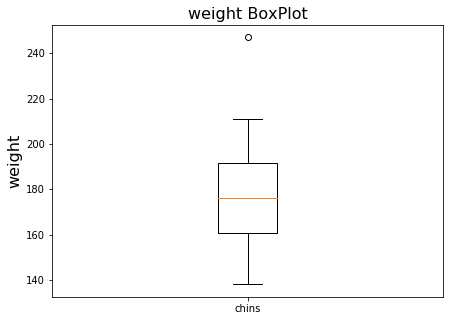

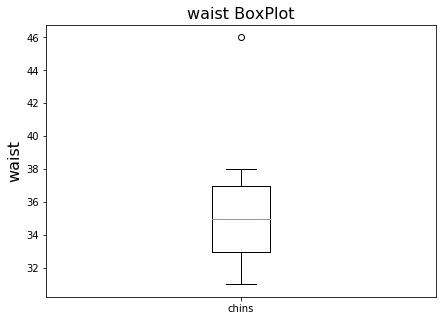

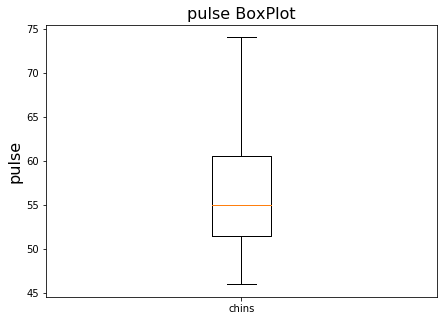

In [9]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
#4. Construct a box-plot for each of the features.
fig, ax = plt.subplots(figsize=(7, 5))
ax.boxplot(weight, 0, labels=['chins'])
ax.set_ylabel('weight', fontsize=16)
ax.set_title('weight BoxPlot', fontsize=16)

fig, ax = plt.subplots(figsize=(7, 5))
ax.boxplot(waist, 0, labels=['chins'])
ax.set_ylabel('waist', fontsize=16)
ax.set_title('waist BoxPlot', fontsize=16)

fig, ax = plt.subplots(figsize=(7, 5))
ax.boxplot(pulse, 0, labels=['chins'])
ax.set_ylabel('pulse', fontsize=16)
ax.set_title('pulse BoxPlot', fontsize=16)

## Part 1B. Linear Regression

You are required to apply Linear Regression to train and make predictions on the **Linnerud** dataset.

**Note:** To perform a supervised learning task, we need to train the model on a training set of the input data and the correct labels, and predict the trained model on **unseen** data. Then, we use the correct labels of the **unseen** data to evaluate the performance of the model. The **unseen** dataset is called the **test set**.

In this part, we will be using one-dimensional linear regression using `Situps` feature and `Waist` label.

**Instruction 1.4.** First you need to split the required feature and label from the **Linnerud** dataset into a training set and a test set. We will use 70% samples for training and 30% for testing. Print the number of samples in each set.

[**Total marks: 5**]

In [10]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
X_for_1D_LR = X[:,np.where(np.array([feature_names_X])[0] == 'Situps')[0]]
Y_for_1D_LR = Y[:,np.where(np.array([label_names_Y])[0] == 'Waist')[0]]

# first, compute the number of samples in the training set:
n_train = int(len(Y_for_1D_LR) * 0.7)
n_test = len(Y_for_1D_LR) - n_train

# The training set is the first n_train samples in the dataset
X_train = X_for_1D_LR[: n_train]
Y_train = Y_for_1D_LR[: n_train]

# The test set is the remaining samples in the dataset
X_test = X_for_1D_LR[-n_test:]
Y_test = Y_for_1D_LR[-n_test:]

# Print the number of samples in the training set
print('The number of samples in the training set:')
print(len(Y_train))


# Print the number of samples in the test set
print('The number of samples in the test set:')
print(len(Y_test))


The number of samples in the training set:
14
The number of samples in the test set:
6


**Instruction 1.5.** Your tasks are:
1. Create a Linear Regression model called `lr`. (5 marks)
2. Fit the training data to the model. (5 marks)

[**Total marks: 10**]

In [11]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

lr = linear_model.LinearRegression()

In [12]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Instruction 1.6** Predict the output of the test set.

[**Total marks: 5**]

In [13]:
Y_pred = lr.predict(X_test)

print(lr.predict([[0]]))

[[42.38880432]]


**Instruction 1.7** Construct a plot, where you will show the regression line for `Waist` vs `Situps`, the training data (use blue colour), the testing data (use green colour), and the residuals for the testing data.

[**Total marks: 5**]

Text(0, 0.5, 'Y')

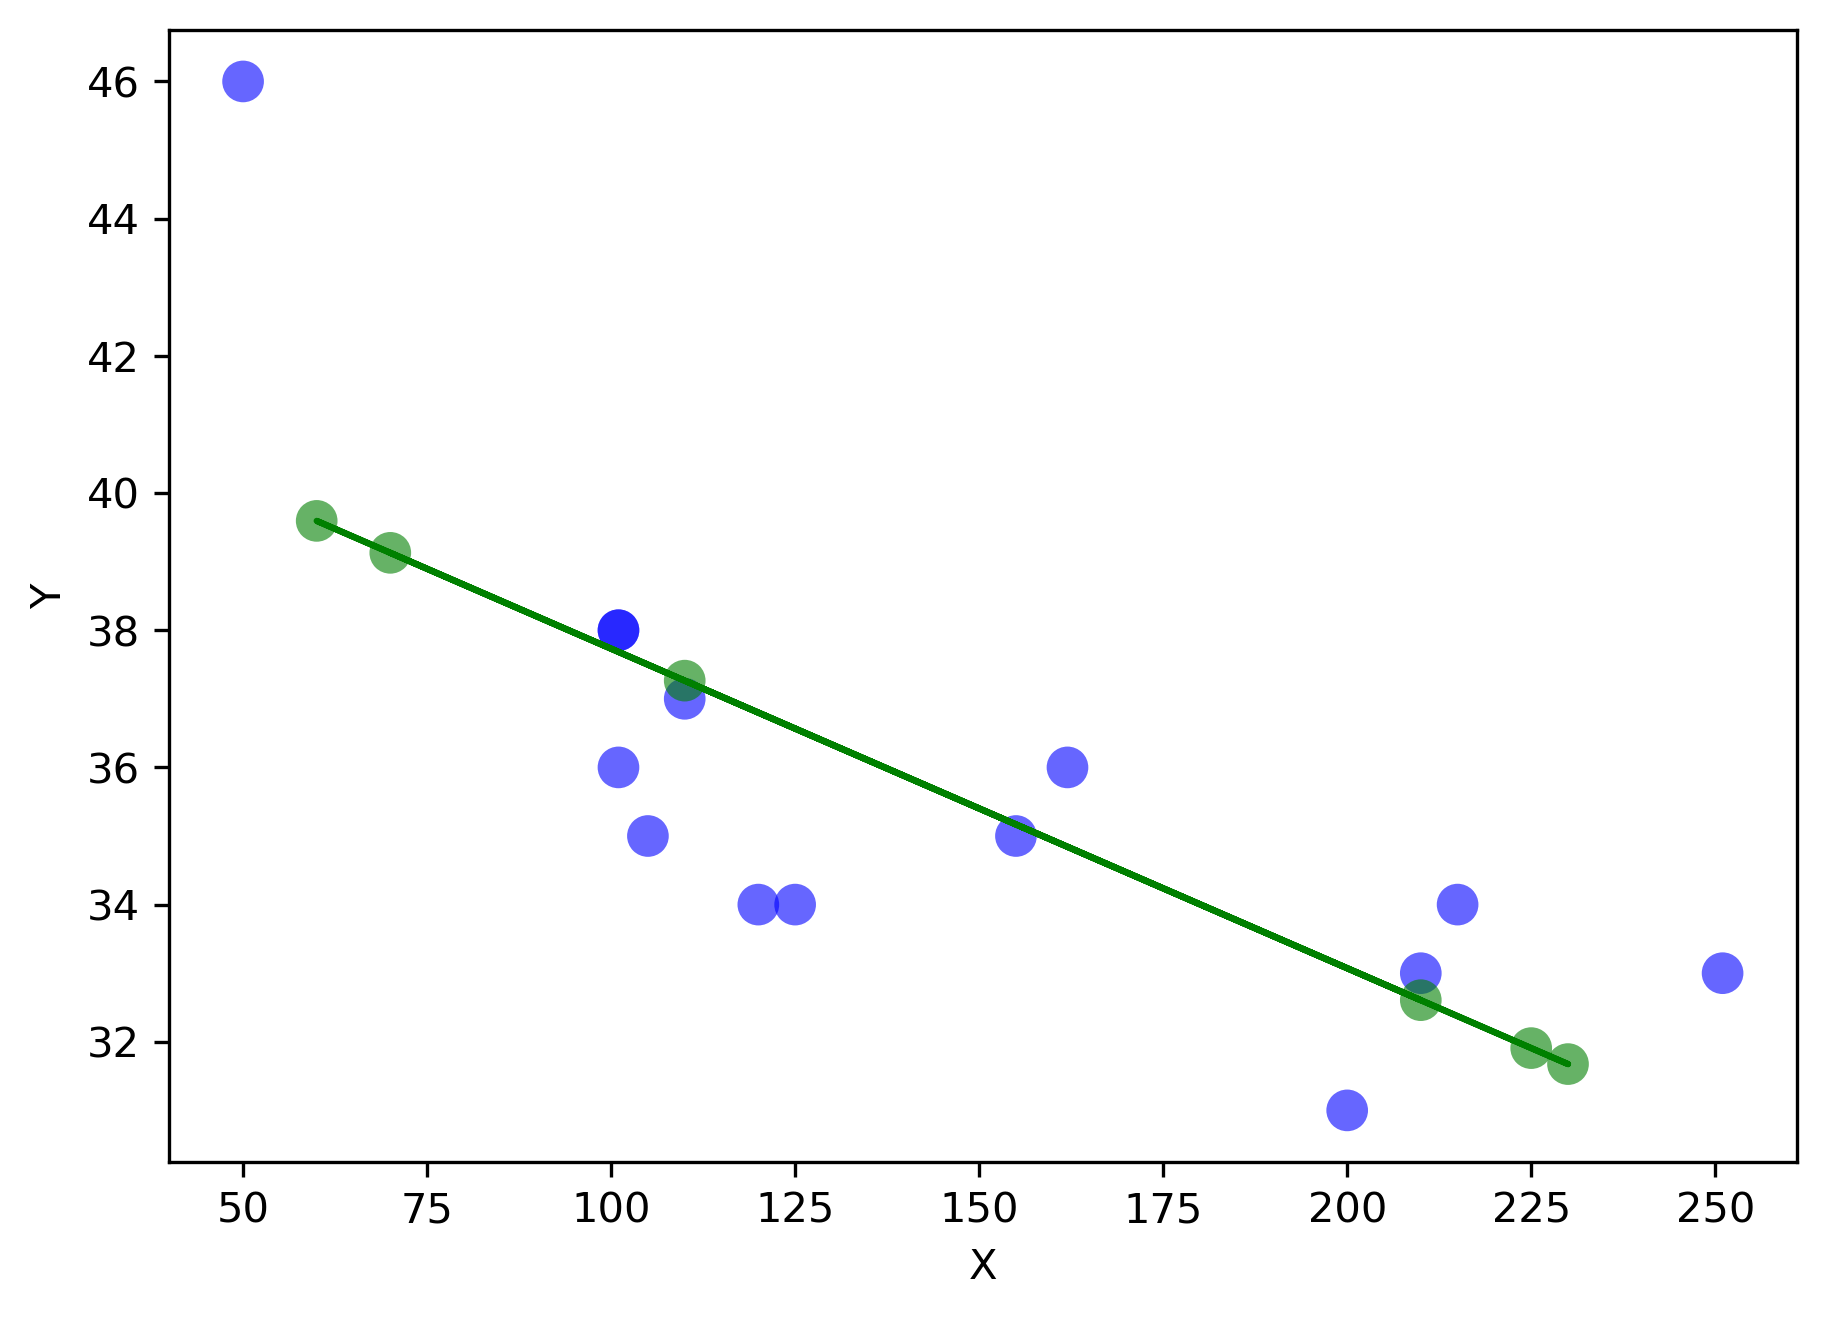

In [14]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
# Construct a plot, where you will show the regression line for Waist vs Situps, the training data (use blue colour), 
# the testing data (use green colour), and the residuals for the testing data.

fig, ax = plt.subplots(figsize=(7, 5), dpi=300)
ax.scatter(X_train,Y_train, alpha=0.6, edgecolor='none', s=100, color='blue')
ax.scatter(X_test,Y_pred, alpha=0.6, edgecolor='none', s=100, color='green')
ax.plot(X_test, Y_pred, color='green')
ax.set_xlabel('X')
ax.set_ylabel('Y')


## Part 1C. Results

**Note:** To evaluate the performance of a Linear Regression model, two commonly used measures are **mean absolute error** and **root mean squared error**.

**mean absolute error** is defined by:

$$mean\_absolute\_error(Y_{test}, Y_{pred}) = \frac{1}{n_{samples}}\sum_{i=1}^{n_{samples}}|y_{test}^i - y_{pred}^i|$$

**root mean squared error** is defined by:

$$root\_mean\_squared\_error(Y_{test}, Y_{pred}) = \sqrt{\frac{1}{n_{samples}}\sum_{i=1}^{n_{samples}}(y_{test}^i - y_{pred}^i)^2}$$


**Instruction 1.8.** Compute **mean absolute error** and **root mean squared error** between the correct labels and the predictions of the test set and print these two values.

[**Total marks: 8**]

**Hint:** You might need to use [Regression metrics](http://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics) from sklearn.

In [15]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# Compute the mean absolute error between Y_test and Y_pred
# Then, print the value
print(metrics.mean_absolute_error(Y_test, Y_pred))


# Compute the root mean squared error between Y_test and Y_pred
# Then, print the value
print(metrics.mean_squared_error(Y_test, Y_pred))


2.6328834897177003
9.216976671960381


## Part 1D. More advanced modelling

**Instruction 1.9 (D, HD)** As we can see, the dataset has multi-dimensional feature vector. Previously we used only one feature to do one-dimensional linear regression model. In this task, we want to create a **two**-dimensional linear regression model for the label `Weight`. First of all, **using Pearson correlation**, we need to decide, which two of three independent variables would be best to use for Y vector in linear regression. Therefore, your tasks are:
1. Write your code to find out which two out of three variables you will be using for linear regression. (5 marks)
2. Explain your choice. (5 marks)

[**Total marks: 10**]

In [16]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
# Write your code to find out which two out of three variable you will be using for linear regression.
print(stats.pearsonr(chins, situps))
print(stats.pearsonr(situps, jumps))
print(stats.pearsonr(chins, jumps))

(0.6957274276618716, 0.0006584821484991131)
(0.6692060795792596, 0.0012517926628529139)
(0.49576018078917017, 0.02621898399991376)


In [17]:
# YOU ARE REQUIRED TO INSERT YOUR COMMENT IN THIS CELL
# the situps variable shall be used as it correlates somewhat with both other variables


**Instruction 1.10 (D, HD)** After we have decided, which features are best to use for linear regression, we need to create training and testing data, where the feature vector is two-dimensional and the label is `Weight`. Also, we will need to compare the two-dimensional linear regression (based on two best independent variables) with on-dimensional linear regression (based on the best independent variable). Therefore, we will need to create a dataset with one-dimensional feature vector for comparison.

Your task is:
1. Create the training and testing datasets for two-dimensional linear regression. (4 marks)
2. Create the one-dimensional training and testing dataset for comparison with 2D linear regression. (1 mark)

[**Total marks: 5**]

In [18]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
# INSERT YOUR CODE HERE
# INSERT YOUR CODE HERE

# first, compute the number of samples in the training set:
# INSERT YOUR CODE HERE

# The training set is the first n_train samples in the dataset
# INSERT YOUR CODE HERE
# INSERT YOUR CODE HERE

# The test set is the remaining samples in the dataset
# INSERT YOUR CODE HERE
# INSERT YOUR CODE HERE

# The 1D comparison dataset
# INSERT YOUR CODE HERE
# INSERT YOUR CODE HERE
# INSERT YOUR CODE HERE



**Instruction 1.11 (D, HD)** We have the training and testing data now. Therefore, your tasks are:
1. Create a linear regression model named `lr2d`. (1 mark)
2. Fit the training data to the model. (1 mark)
3. Predict the output on the test set. (1 mark)
4. Compute **mean absolute error** and **root mean squared error** between the correct labels and the predictions of the test set and print these two values. (1 mark)

[**Total marks: 4**]

In [19]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
# INSERT YOUR CODE HERE
lr2d = 

SyntaxError: invalid syntax (<ipython-input-19-08cfe836cb64>, line 3)

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
# INSERT YOUR CODE HERE


In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
# INSERT YOUR CODE HERE


In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
# INSERT YOUR CODE HERE

**Instruction 1.12 (D, HD)** Now we can compare the errors for two-dimensional linear regression with one-dimensional linear regression. Your tasks are:
1. Create a linear regression model named `lr1d_compare`. Fit the one-dimensional training data and the same labels to the model. Predict the output on the comparison dataset. (1 mark)
2. Compute **mean absolute error** and **root mean squared error** between the correct labels and the predictions of the comparison set and print these two values. (1 mark)
3. Discuss the findings and explain the result. In discussion, consider the relationships between the size of the dataset, the Pearson correlation coefficients you have calculated above, the `Weight` values and the values of errors. (4 marks)

[**Total marks: 6**]

In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
# INSERT YOUR CODE HERE


In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
# INSERT YOUR CODE HERE


In [ ]:
# YOU ARE REQUIRED TO INSERT YOUR COMMENT IN THIS CELL
# INSERT YOUR COMMENT HERE


# <span style="color:#0b486b">Part 2: Classification</span>

In this part, you will be required to apply Naive Bayes algorithm for the classification task on the **breast cancer** dataset from sklearn. More about the dataset can be found [here](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer). 

Here, we apply Multinomial Naive Bayes for discrete features. We can construct a Multinomial Naive Bayes model by calling **naive_bayes.MultinomialNB()** from sklearn package. More about the model can be found [here](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB)


## Part 2A: Load and examine the dataset

**Instruction 2.1.** Write your code to load the **breast cancer** dataset from sklearn and assign it to a variable called `cancer`.

[**Total mark: 1**]

In [25]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
1. Write your code to load the dataset from sklearn and assign it to a variable called `cancer`.
'''
cancer =  datasets.load_breast_cancer()

print(cancer.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


**Note:** The cell code below assigns the data to variable `X` and the labels to variable `Y`. Run the cell and use `X` and `Y` for later tasks.

In [26]:
X = cancer['data']
Y = cancer['target']

**Instruction 2.2.** Now you need to examine the size of data. Write your code to find and print out the number of **samples** and the number of **features** in the dataset.

[**Total mark: 1**]

In [27]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
2. Write your code to find and print out the number of **samples** 
    and the number of **features** in the dataset.
    Using variable X.
'''
print('The number of samples:')
print(len(X))


print('The number of features:')
print(len(cancer['feature_names']))


The number of samples:
569
The number of features:
30


**Instruction 2.3.** The following code segment is designed to do some statistics on the labels to get a brief understanding about the prediction task. This is a classication task, it is important to know the number of categories (or number of classes) in the dataset and their frequencies.

**Your tasks are:**

1. Write your code to compute and print the number of classes in the dataset. (1 marks)
2. Write your code to compute and print the number of occurrences of each class. (3 marks)

[**Total marks: 4**]

In [28]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
1. Write your code to compute and print the number of classes in the dataset.
    Using variable Y.
'''

# compute and print the number of classes.
print(len(np.unique(Y)))
print(cancer['target_names'])

2
['malignant' 'benign']


In [29]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
2. Write your code to compute and print the number of occurrences of each class.
'''

# compute and print the number of occurrences of each class
count0 = 0
count1 = 0
for i in Y:
    if i == 0:
        count0 += 1
    if i == 1:
        count1 += 1
        
print("number of malignent tumours: " + str(count0))
print("number of benign tumours: " + str(count1))

number of malignent tumours: 212
number of benign tumours: 357


## Part 2B. Classification with Naive Bayes

You are required to apply Naive Bayes to train and make predictions on the **breast cancer** dataset.

Multinomial Naive Bayes classifier is used for discrete data. The features of the breast cancer dataset are however real values. The function below discretise the features in to 0 (low), 1 (middle) and 2 (high). Run the cell below.

In [30]:
def discretise(X):
    # for each feature, values smaller than 33% percentile are set by 0 (low), 
    # from 33% to 67% percentile are set by 1 (middle) and other are set by 2 (high).
    
    n_feats = X.shape[-1]
    X_discrete = np.zeros(X.shape)
    
    for i in range(n_feats):
        # compute val1 and val2 as the percentile of 33% and 67%, respectively of the column i
        val1, val2 = np.percentile(X[:, i], 33), np.percentile(X[:, i], 67)   
        
        # increase all discrete values by 1 for all values in X that larger than val1
        ids = np.where(X[:, i] > val1)[0]
        X_discrete[ids, i] += 1
        
        # increase all discrete values by 1 for all values in X that larger than val2
        ids = np.where(X[:, i] > val2)[0]
        X_discrete[ids, i] += 1
        
    return X_discrete


Then we call the discretise function for the feature X. Run the cell below and your data are ready for classification.

In [31]:
X = discretise(X)

print(len(X))

569


**Instruction 2.4.** Similar to **Part 1**, you need to split the dataset into a training set and a test set. We will use 70% samples for training and 30% for testing. Print the number of samples in each set.

[**Total marks: 2**]

In [32]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# first, compute the number of samples in the training set:
n_train = int(len(Y) * 0.7)
n_test = len(Y) - n_train

# The training set is the first n_train samples in the dataset
X_train = X[: n_train]
Y_train = Y[: n_train]

# The test set is the remaining samples in the dataset
X_test = X[-n_test:]
Y_test = Y[-n_test:]

# Print the number of samples in the training set
print('The number of samples in the training set:')
print(len(X_train))


# Print the number of samples in the test set
print('The number of samples in the test set:')
print(len(X_test))

The number of samples in the training set:
398
The number of samples in the test set:
171


**Instruction 2.5.** Create a Multinomial Naive Bayes model called `mnb`.

[**Total marks: 2**]

In [33]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
mnb = naive_bayes.MultinomialNB()

**Instruction 2.6.** Fit the training data to the model.

[**Total marks: 2**]

In [34]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
mnb.fit(X_train, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

**Instruction 2.7** Predict the output of the test set.

[**Total marks: 2**]

In [35]:
Y_pred = mnb.predict(X_test)

## Part 2C. Results and Visualization

**Note:** To evaluate the performance of a classification task, commonly used measures are **accuracy**, **precision**, **recall** and **f1-score**.

**Instruction 2.8.** Compute the **accuracy**, **precision**, **recall** and **f1-score** of the predictions on the test set and print these values.

[**Total marks: 8**]

**Hint:** You might need to see [Classification metrics](http://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics) from sklearn.

In [36]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# Compute and print the accuracy of predictions on the test set
print("accuracy: " + str(metrics.accuracy_score(Y_test, Y_pred)))


# Compute and print the precision of predictions on the test set
print("precision: " + str(metrics.precision_score(Y_test, Y_pred)))


# Compute and print the recall of predictions on the test set
print("recall: " + str(metrics.recall_score(Y_test, Y_pred)))


# Compute and print the f1-score of predictions on the test set
print("f1-score: " + str(metrics.f1_score(Y_test, Y_pred)))

accuracy: 0.7309941520467836
precision: 0.9886363636363636
recall: 0.6590909090909091
f1-score: 0.790909090909091


**Note:** We have evaluated the performance of the classification task by different measures. Now, we want to visualise the data as well as the predicted labels. [t-SNE](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) is a tool to convert high-dimensional data into low-dimensional ones. To visualise the data, we can use t-SNE to reduce the data dimension to 2D.

The following function `reduce_to_2D` takes the matrix X of size (n_samples, n_features) and returns a matrix of size (n_samples, 2), which is a dimension-reduced version of X. **You will need this function for a subsequent task**.

In [37]:
def reduce_to_2D(X):
    tsne = TSNE(n_components=2, random_state=1)
    new_X = tsne.fit_transform(X)
    return new_X

**Instruction 2.9**. Visualisation.

**Your tasks are:**

1. Create a variable named `X_test_2D` that is the dimension-reduced version of X_test using function `reduce_to_2D`. (4 marks)

2. Visualise `X_test_2D` using scatter() with the colors being the corresponding predicted labels. (4 marks)


[**Total mark: 8**]

In [38]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
1. Create a variable named `X_test_2D` 
    that is the dimension-reduced version of X_test using function `reduce_to_2D`.
'''

X_test_2D = reduce_to_2D(X_test)

Text(0, 0.5, 'Y')

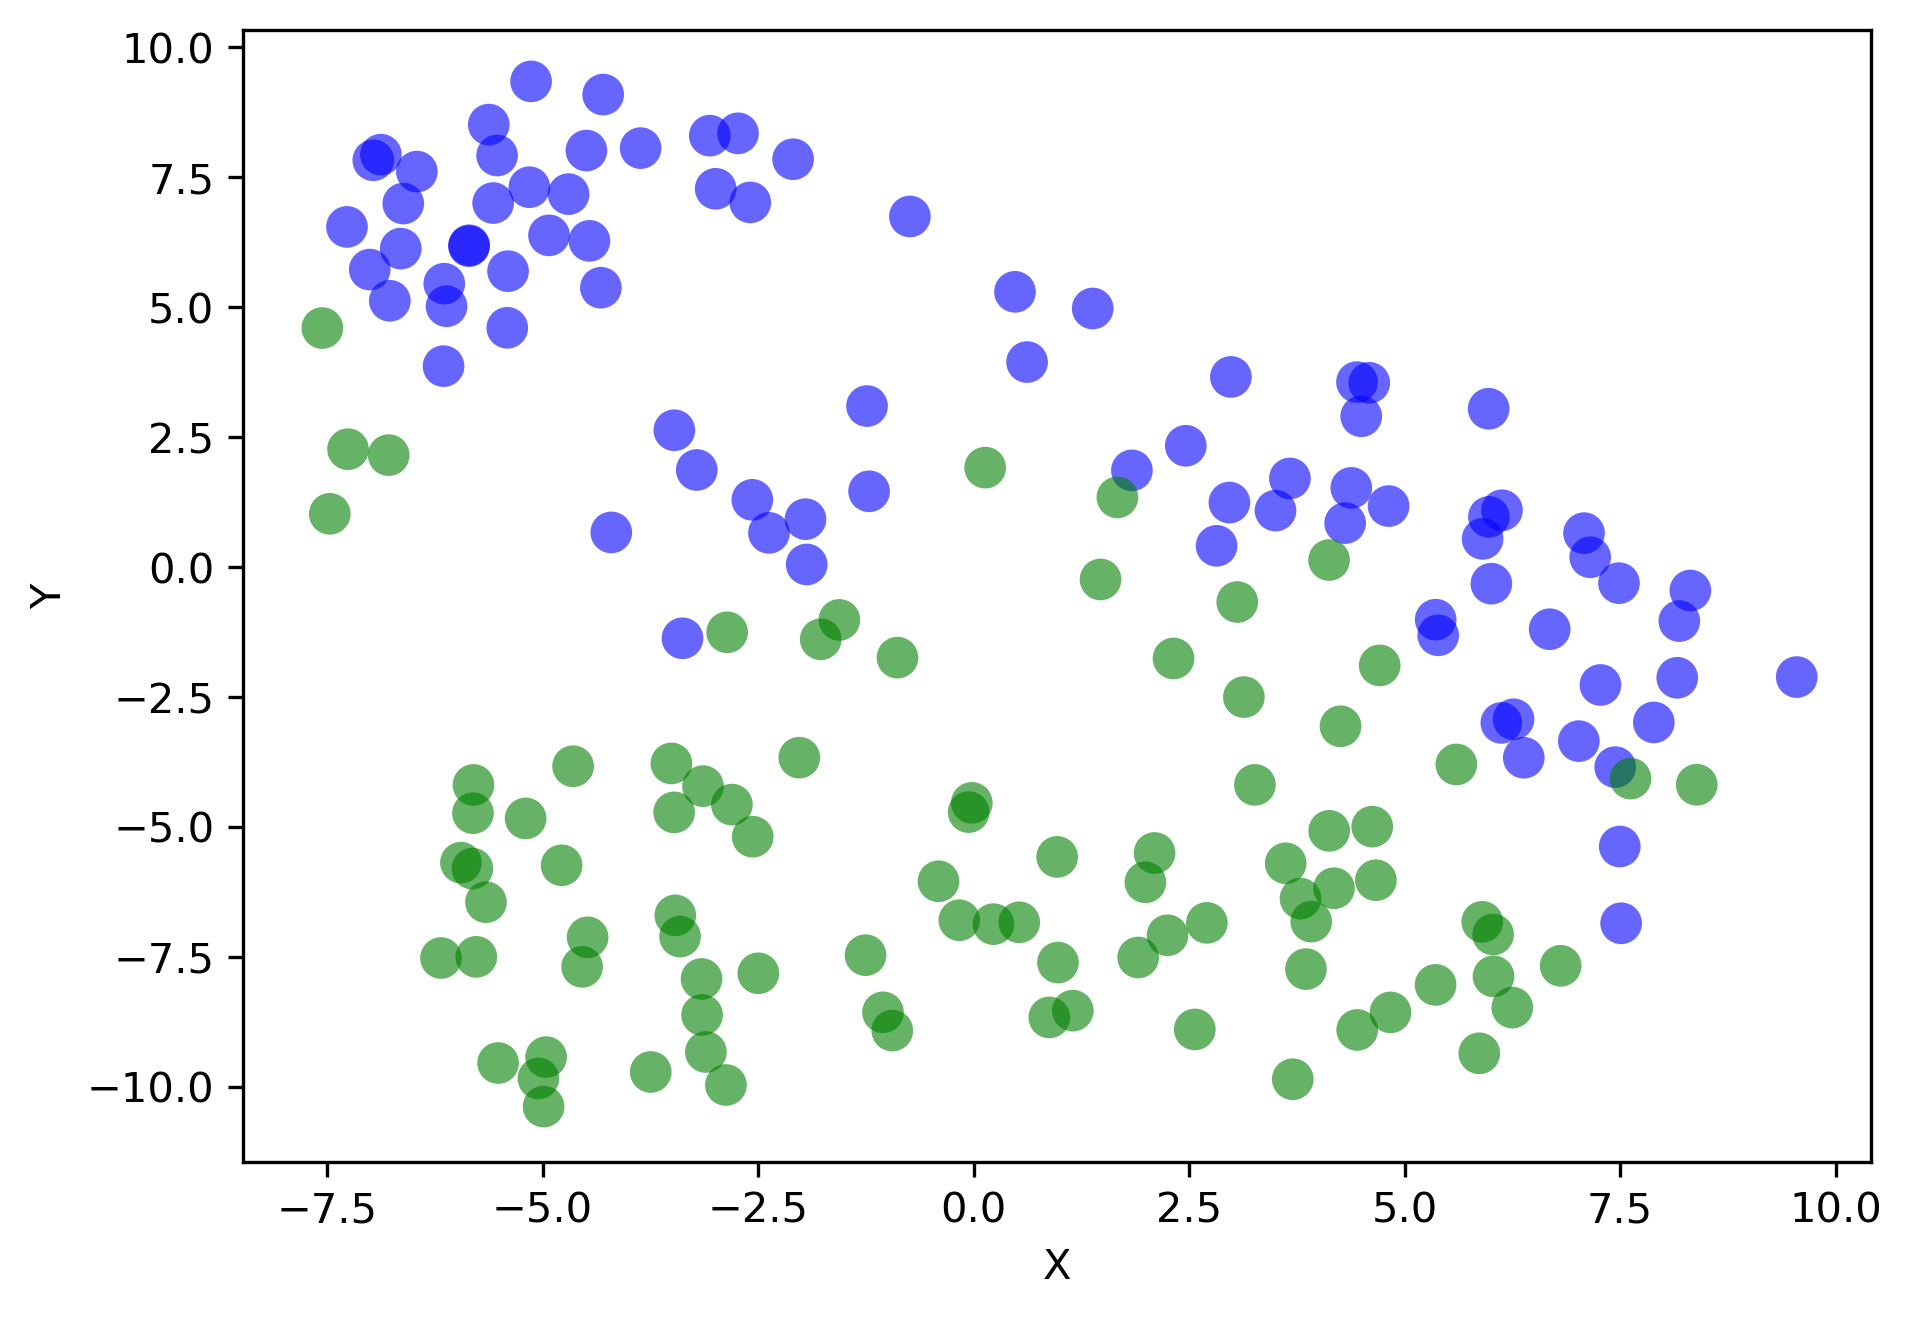

In [39]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
2. Visualise `X_test_2D` by scatters with the colors being the corresponding predicted labels.
'''

def splitByDimension2D(inList):
    X = []
    Y = []

    for i in inList:
        X.append(i[0])
        Y.append(i[1])
        
    return X, Y

def splitByTwoTag(inList, tagList):
    tag_0 = []
    tag_1 = []
    
    for i, x in enumerate(inList):
        if tagList[i] == 0:
            tag_0.append(x)
        if tagList[i] == 1:
            tag_1.append(x)
    return tag_0, tag_1

tag_0, tag_1 = splitByTwoTag(X_test_2D, Y_pred)
X_0_0, X_0_1 = splitByDimension2D(tag_0)
X_1_0, X_1_1 = splitByDimension2D(tag_1)


fig, ax = plt.subplots(figsize=(7, 5), dpi=300)
ax.scatter(X_0_0, X_0_1, alpha=0.6, edgecolor='none', s=100, color='blue')
ax.scatter(X_1_0, X_1_1, alpha=0.6, edgecolor='none', s=100, color='green')

ax.set_xlabel('X')
ax.set_ylabel('Y')
